# Tomografía de Resistividad Eléctrica

In [2]:
import pygimli as pg 
import matplotlib.pyplot as plt
from pygimli.physics import ert
import pygimli.meshtools as mt
import numpy as np

# Modelo directo

Define la geometría para el dominio modelado. 

In [3]:
world = mt.createWorld(start=[-50, 0], end=[50, -50], layers=[-6, -15], worldMarker=False)

In [4]:
block = mt.createCircle(pos=[-5, -11], radius=[4, 2], marker = 4, boundaryMarker=10)

In [5]:
poly = mt.createPolygon([(1, -4), (2, -1.5), (4, -2), (5, -2), 
                         (8, -3), (5, -3.5), (3, -4.5)], 
                        isClosed=True, marker=5, addNodes=3, 
                        interpolate="spline")

In [6]:
geom = world + block + poly

Mostrar geometría con pg.show()

(<Axes: >, None)

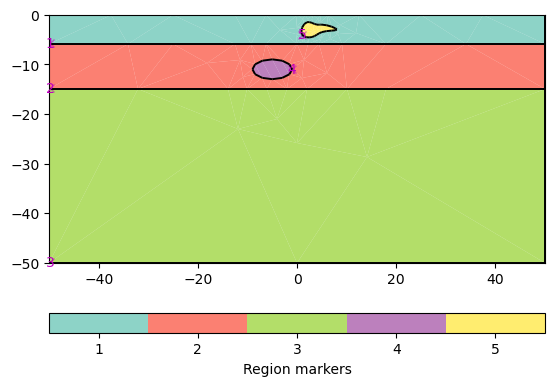

In [7]:
pg.show(geom)

## Generar datos sintéticos

In [8]:
scheme = ert.createData(elecs=np.linspace(start=-15, stop=15, num=32), schemeName='slm')

In [9]:
for p in scheme.sensors():
    geom.createNode(p)
    geom.createNode(p - [0, 0.1])

mesh = mt.createMesh(geom, quality=34)

rhomap = [[1, 100.],
          [2, 250.],
          [3, 400.],
          [4, 1.],
          [5, 10.]]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x19f77434490>)

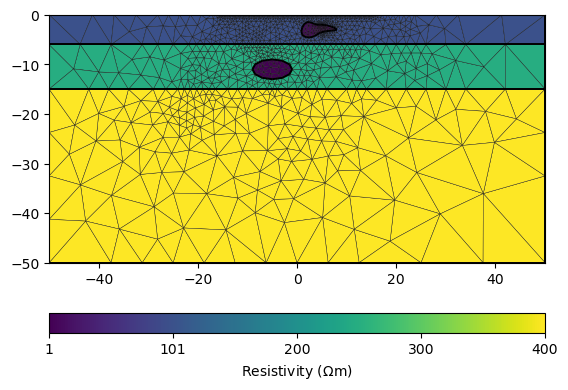

In [10]:
pg.show(mesh, data=rhomap, label=pg.unit('res'), showMesh=True)

## Simulación de adquisición

**Generación de datos sintéticos del modelo**

In [11]:
data = ert.simulate(mesh, scheme=scheme, res=rhomap, noiselevel=1, seed=1337, noiseAbs=1e-6)

pg.info(np.linalg.norm(data['err']), np.linalg.norm(data['rhoa']))
pg.info('Simulated data', data)
pg.info('The data contains:', data.dataMap().keys())

pg.info('Simulated rhoa (min/max)', min(data['rhoa']), max(data['rhoa']))
pg.info('Selected data noise %(min/max)', min(data['err'])*100, max(data['err'])*100)

14/02/24 - 12:37:14 - pyGIMLi - INFO - 0.0 1400.7847838985049
14/02/24 - 12:37:14 - pyGIMLi - INFO - Simulated data Data: Sensors: 32 data: 225, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'rhoa', 'valid']
14/02/24 - 12:37:14 - pyGIMLi - INFO - The data contains: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
14/02/24 - 12:37:14 - pyGIMLi - INFO - Simulated rhoa (min/max) 53.77422172638002 137.41779929006475
14/02/24 - 12:37:14 - pyGIMLi - INFO - Selected data noise %(min/max) 0.0 0.0


In [12]:
data.remove(data['rhoa'] < 0)

In [14]:
data.save('synth_data.dat')

1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x19f7f18d9d0>)

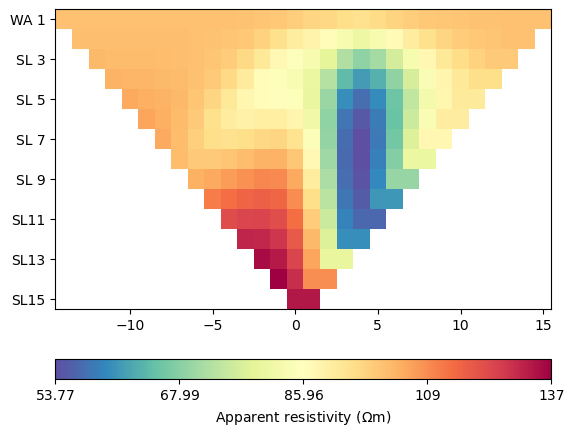

In [15]:
ert.showData(data)

In [16]:
data["k"]=ert.geometricFactors(data)
data["err"]=ert.estimateError(data, relativeError=0.03, absoluteError=50e-6)

In [17]:
mgr = ert.ERTManager(data)

In [18]:
inv = mgr.invert(verbose=True)

14/02/24 - 12:41:03 - pyGIMLi - INFO - Found 2 regions.
14/02/24 - 12:41:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


14/02/24 - 12:41:03 - pyGIMLi - INFO - Found 2 regions.
14/02/24 - 12:41:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/02/24 - 12:41:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/02/24 - 12:41:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/02/24 - 12:41:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1452 Cells: 2708 Boundaries: 2128
14/02/24 - 12:41:03 - pyGIMLi - INFO - Use median(data values)=96.21796013176223
14/02/24 - 12:41:03 - pyGIMLi - INFO - Created startmodel from forward operator: 453, min/max=96.217960/96.217960
14/02/24 - 12:41:03 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000019F7F59CE50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000019F7F59CBD0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000019F7F59CA40>
min/max (data): 53.77/137
min/max (error): 3%/3%
min/max (start model): 96.22/96.22
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   52.37
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.15 (dPhi = 92.51%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.38 (dPhi = 71.70%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.38)                   #
################################################################################


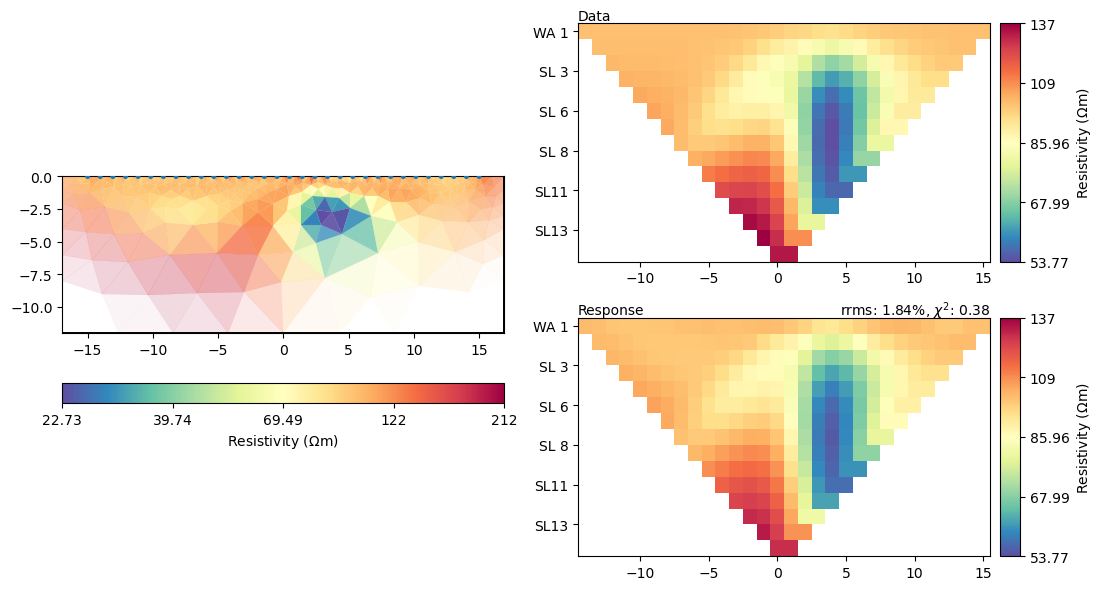

In [19]:
mgr.showResultAndFit()
plt.show()